In [9]:
import pandas as pd

df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


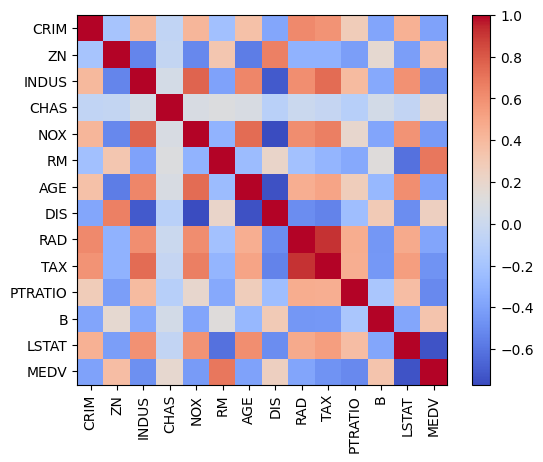

In [10]:
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.imshow(corr_matrix.to_numpy(), cmap='coolwarm', interpolation='nearest')  # 
plt.colorbar()

plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)

plt.show()


In [11]:
df['ZN'] = df['ZN'].fillna(0)

In [12]:
df['ZN'] = df['ZN'] / 100
df['RM'] = df['RM'] / 4

X = df[['RM', 'ZN']].to_numpy()
Y = df['MEDV'].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

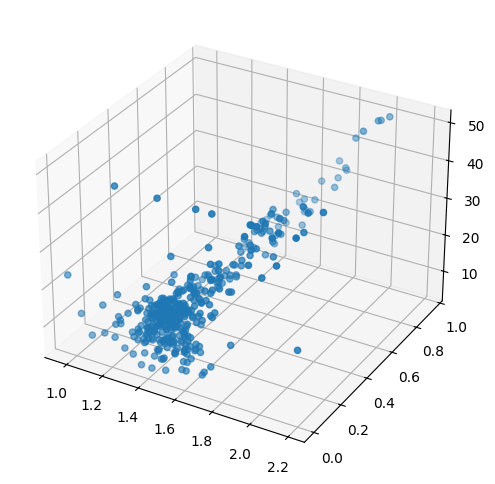

In [14]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.show()

In [15]:
from lls import LLSRegression

model = LLSRegression()

In [16]:
model.fit(x_train, y_train)

In [17]:
y_pred = model.predict(x_test)

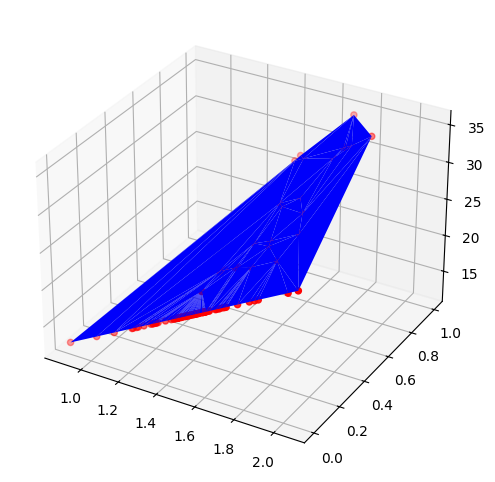

In [25]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred, color='red')
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred, color='blue')
plt.show()